This notebook provides recipes for loading and saving data from external sources.

In [ ]:
!pip install  torch
!pip install matplotlib
!pip install numpy
!pip install pandas

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

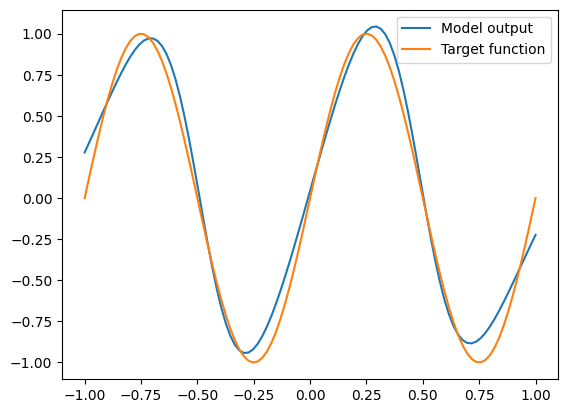

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet, self).__init__()
    self.linear1 = nn.Linear(1, 4)
    self.linear2 = nn.Linear(4, 1)

  def forward(self, x):

    y=self.linear1(x)
    y=torch.tanh(y)
    y=self.linear2(y)
    return(y)

# Initialize the network
model = SimpleNet()
optimizer = optim.SGD(model.parameters(), lr=0.1)


# Define the input data
x = torch.linspace(-1, 1, 100).reshape(100, 1)
y_gt = torch.sin(2 * torch.pi * x)#+torch.exp(-x)+torch.log(2+x)


for epoch in range(100):
  # Forward pass
  y = model(x)

  # Calculate the loss
  loss = torch.mean((y - y_gt)**2)

  # Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



plt.plot(x.numpy(), y.detach().numpy(), label="Model output")
plt.plot(x.numpy(), y_gt.numpy(), label="Target function")
plt.legend()
plt.show()


Define Model or network